In [0]:
import pystan

In [0]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from fbprophet import Prophet


In [0]:
#prophet
#energy prediction da
timeseries = pd.read_csv('timeseries.csv')
timeseries.shape
timeseries

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.200000,48.900000,17.033333,45.530000,6.60,733.500000,92.000000,7.000000,63.000000,5.30,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000,6.48,733.600000,92.000000,6.666667,59.166667,5.20,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000,6.37,733.700000,92.000000,6.333333,55.333333,5.10,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.100000,48.590000,17.000000,45.400000,6.25,733.800000,92.000000,6.000000,51.500000,5.00,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.100000,48.590000,17.000000,45.400000,6.13,733.900000,92.000000,5.666667,47.666667,4.90,10.084097,10.084097
5,11-01-2016 17:50,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.100000,48.590000,17.000000,45.290000,6.02,734.000000,92.000000,5.333333,43.833333,4.80,44.919484,44.919484
6,11-01-2016 18:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.100000,48.590000,17.000000,45.290000,5.90,734.100000,92.000000,5.000000,40.000000,4.70,47.233763,47.233763
7,11-01-2016 18:10,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.100000,48.590000,17.000000,45.290000,5.92,734.166667,91.833333,5.166667,40.000000,4.68,33.039890,33.039890
8,11-01-2016 18:20,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.100000,48.590000,17.000000,45.290000,5.93,734.233333,91.666667,5.333333,40.000000,4.67,31.455702,31.455702
9,11-01-2016 18:30,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,55.000000,6.190000,87.626667,17.200000,41.500000,18.100000,48.590000,17.000000,45.290000,5.95,734.300000,91.500000,5.500000,40.000000,4.65,3.089314,3.089314


In [0]:
Prophet

fbprophet.forecaster.Prophet

In [0]:
data = timeseries[['date','Appliances']]
data.head()
data.columns = ['ds','y']

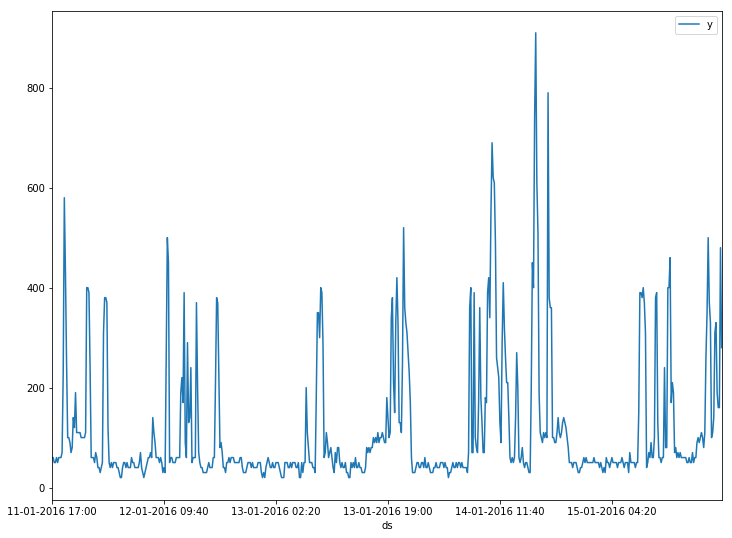

In [0]:
data.set_index('ds').plot(figsize=(12,9))

In [0]:

data.columns = ['ds','y']
np.log(data['y'])

0      4.094345
1      4.094345
2      3.912023
3      3.912023
4      4.094345
5      3.912023
6      4.094345
7      4.094345
8      4.094345
9      4.248495
10     5.438079
11     6.363028
12     6.063785
13     5.521461
14     4.605170
15     4.605170
16     4.499810
17     4.248495
18     4.382027
19     4.941642
20     4.787492
21     5.247024
22     4.700480
23     4.700480
24     4.700480
25     4.700480
26     4.605170
27     4.605170
28     4.605170
29     4.605170
         ...   
569    4.094345
570    3.912023
571    3.912023
572    4.248495
573    3.912023
574    4.094345
575    4.094345
576    4.499810
577    4.605170
578    4.499810
579    4.605170
580    4.700480
581    4.605170
582    4.382027
583    4.700480
584    5.560682
585    5.857933
586    6.214608
587    5.913503
588    5.799093
589    4.605170
590    4.700480
591    4.941642
592    5.736572
593    5.799093
594    5.247024
595    5.075174
596    5.075174
597    6.173786
598    5.634790
Name: y, Length: 599, dt

In [0]:
data.head()

,ds,y
0,11-01-2016 17:00,60
1,11-01-2016 17:10,60
2,11-01-2016 17:20,50
3,11-01-2016 17:30,50
4,11-01-2016 17:40,60


In [0]:

np.log(data['y'])

0      4.094345
1      4.094345
2      3.912023
3      3.912023
4      4.094345
5      3.912023
6      4.094345
7      4.094345
8      4.094345
9      4.248495
10     5.438079
11     6.363028
12     6.063785
13     5.521461
14     4.605170
15     4.605170
16     4.499810
17     4.248495
18     4.382027
19     4.941642
20     4.787492
21     5.247024
22     4.700480
23     4.700480
24     4.700480
25     4.700480
26     4.605170
27     4.605170
28     4.605170
29     4.605170
         ...   
569    4.094345
570    3.912023
571    3.912023
572    4.248495
573    3.912023
574    4.094345
575    4.094345
576    4.499810
577    4.605170
578    4.499810
579    4.605170
580    4.700480
581    4.605170
582    4.382027
583    4.700480
584    5.560682
585    5.857933
586    6.214608
587    5.913503
588    5.799093
589    4.605170
590    4.700480
591    4.941642
592    5.736572
593    5.799093
594    5.247024
595    5.075174
596    5.075174
597    6.173786
598    5.634790
Name: y, Length: 599, dt

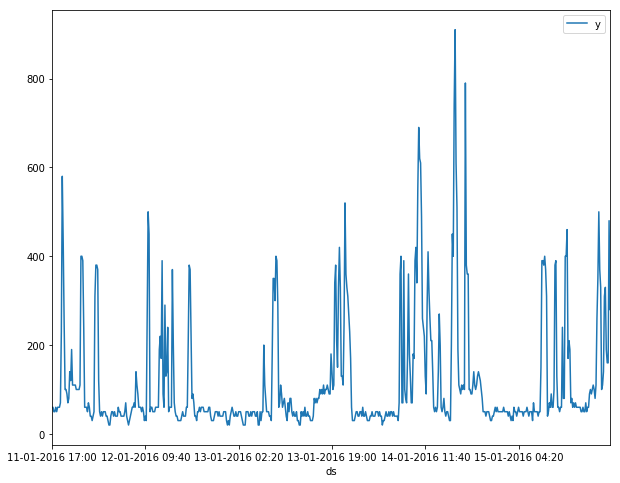

In [0]:

data.set_index('ds').plot(figsize=(10,8))

In [0]:
#features /attributes prophet
#hourly ,daily,monthly,weekly,observation
#day of week and time of year find seasonalities

In [0]:
#forecasting the prophet
forecast = Prophet()

forecast.params

{}

In [0]:
forecast.params

{}

In [0]:
forecast.fit(data)


/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [0]:
#prophet uses addictive usage model

forecast.make_future_dataframe(periods= 10)

,ds
0,2016-01-13 00:00:00
1,2016-01-13 00:10:00
2,2016-01-13 00:20:00
3,2016-01-13 00:30:00
4,2016-01-13 00:40:00
5,2016-01-13 00:50:00
6,2016-01-13 01:00:00
7,2016-01-13 01:10:00
8,2016-01-13 01:20:00
9,2016-01-13 01:30:00


In [0]:
data.columns = ['ds','y']

In [0]:
data
data.columns =['ds','y']
forecast.params

{'beta': array([[ 0.03172559,  0.00809583, -0.07150031, -0.0652442 ,  0.09271269,
          0.05239751, -0.03158047, -0.03214615, -0.05709346,  0.00777273,
          0.02791778, -0.01314107, -0.00141467, -0.00160405]]),
 'delta': array([[ 1.04795915e-09,  1.27633587e-06, -5.62614036e-09,
          4.26374399e-09,  3.61074346e-09, -2.26368154e-09,
         -9.45330397e-10,  3.99874774e-09, -4.11304496e-10,
          4.25411249e-09, -1.75749859e-09,  1.59371776e-09,
         -3.43011889e-09,  7.19099799e-10,  5.49153833e-09,
         -4.73081772e-09, -2.71117879e-09, -3.32721679e-09,
         -5.40995059e-09,  9.31407831e-10, -1.35166660e-09,
         -6.07452090e-09, -8.45988578e-09, -6.43906331e-09,
         -3.08221172e-09]]),
 'k': array([[-0.0732415]]),
 'm': array([[0.15949199]]),
 'sigma_obs': array([[0.12575261]])}

In [0]:
forecast.make_future_dataframe(periods=5).tail()

,ds
599,2016-12-02 23:50:00
600,2016-12-03 23:50:00
601,2016-12-04 23:50:00
602,2016-12-05 23:50:00
603,2016-12-06 23:50:00


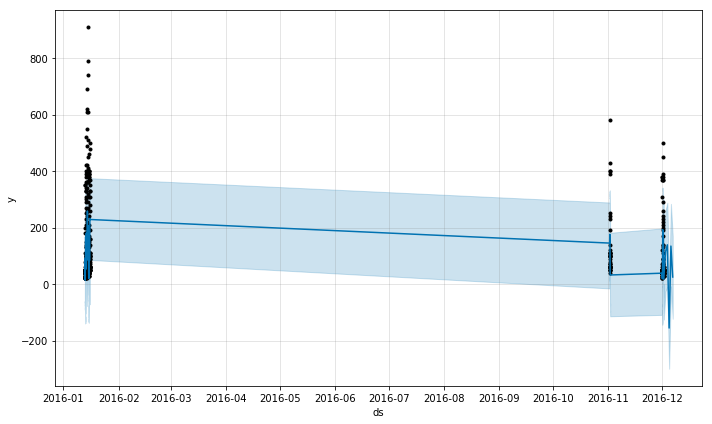

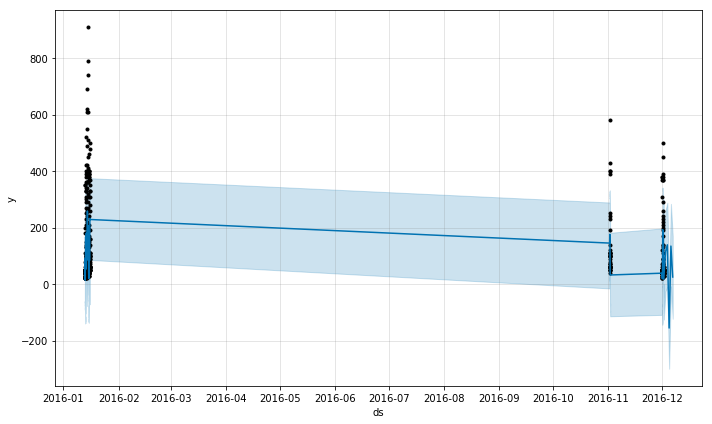

In [0]:
forecast1 = forecast.make_future_dataframe( periods=5)
generate_forecast = forecast.predict(forecast1)
generate_forecast.columns

generate_forecast[['ds','yhat']]
forecast.plot(generate_forecast)


In [0]:
generate_forecast = ['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat']
generate_forecast


['ds',
 'trend',
 'yhat_lower',
 'yhat_upper',
 'trend_lower',
 'trend_upper',
 'additive_terms',
 'additive_terms_lower',
 'additive_terms_upper',
 'daily',
 'daily_lower',
 'daily_upper',
 'weekly',
 'weekly_lower',
 'weekly_upper',
 'multiplicative_terms',
 'multiplicative_terms_lower',
 'multiplicative_terms_upper',
 'yhat']

In [0]:
generate_forecast= ['ds','yhat']
generate_forecast

['ds', 'yhat']

TypeError: ignored

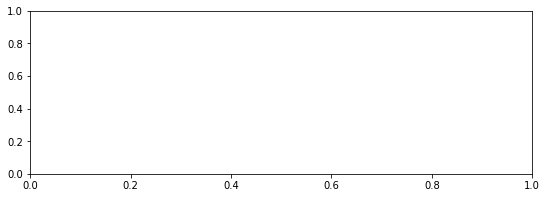

In [0]:
forecast.plot_components(generate_forecast)

In [0]:
#mean absolute error percentage
from sklearn.metrics import mean_absolute_error

In [0]:
data1 = forecast.predict(data)

In [0]:
forecast.validate_inputs()

In [0]:
data1.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [0]:
#mean absolute percentage error is less than 10 it is good model


In [0]:
import pandas as pd
import numpy as np
import warnings
import scipy
from datetime import timedelta


In [0]:
#for machine learning approach
from statsmodels.tsa.tsatools import lagmat
from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [0]:
#visulaization
import matplotlib.pyplot as plt
import seaborn as sns

#load the file
train = pd.read_csv('sample_train.csv')
train.head(500)

,Unnamed: 0,Page,01-07-2015,02-07-2015,03-07-2015,04-07-2015,05-07-2015,06-07-2015,07-07-2015,08-07-2015,09-07-2015,10-07-2015,11-07-2015,12-07-2015,13-07-2015,14-07-2015,15-07-2015,16-07-2015,17-07-2015,18-07-2015,19-07-2015,20-07-2015,21-07-2015,22-07-2015,23-07-2015,24-07-2015,25-07-2015,26-07-2015,27-07-2015,28-07-2015,29-07-2015,30-07-2015,31-07-2015,01-08-2015,02-08-2015,03-08-2015,04-08-2015,05-08-2015,06-08-2015,07-08-2015,...,02-08-2017,03-08-2017,04-08-2017,05-08-2017,06-08-2017,07-08-2017,08-08-2017,09-08-2017,10-08-2017,11-08-2017,12-08-2017,13-08-2017,14-08-2017,15-08-2017,16-08-2017,17-08-2017,18-08-2017,19-08-2017,20-08-2017,21-08-2017,22-08-2017,23-08-2017,24-08-2017,25-08-2017,26-08-2017,27-08-2017,28-08-2017,29-08-2017,30-08-2017,31-08-2017,01-09-2017,02-09-2017,03-09-2017,04-09-2017,05-09-2017,06-09-2017,07-09-2017,08-09-2017,09-09-2017,10-09-2017
0,0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,...,46.0,24.0,22.0,22.0,11.0,25.0,45.0,39.0,17.0,18.0,13.0,57.0,18.0,14.0,19.0,39.0,22.0,16.0,28.0,21.0,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,...,39.0,20.0,31.0,19.0,7.0,11.0,20.0,13.0,16.0,16.0,47.0,21.0,20.0,12.0,13.0,20.0,22.0,20.0,12.0,37.0,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,...,22.0,8.0,4.0,3.0,1.0,3.0,7.0,3.0,1.0,9.0,4.0,2.0,6.0,3.0,3.0,3.0,8.0,2.0,4.0,3.0,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,...,37.0,14.0,12.0,13.0,11.0,10.0,14.0,15.0,15.0,11.0,19.0,9.0,19.0,8.0,17.0,11.0,18.0,20.0,11.0,11.0,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,39.0,66.0,114.0,19.0,29.0,12.0,11.0,14.0,14.0,63.0,12.0,22.0,14.0,20.0,11.0,23.0,66.0,19.0,23.0,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
5,5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,12.0,11.0,7.0,9.0,6.0,10.0,8.0,13.0,3.0,14.0,4.0,9.0,14.0,10.0,8.0,3.0,74.0,17.0,8.0,6.0,9.0,3.0,10.0,21.0,9.0,5.0,3.0,4.0,...,41.0,35.0,18.0,18.0,15.0,16.0,13.0,14.0,29.0,18.0,28.0,21.0,10.0,19.0,13.0,8.0,54.0,19.0,14.0,41.0,32.0,46.0,31.0,29.0,31.0,28.0,17.0,16.0,8.0,13.0,13.0,13.0,45.0,4.0,13.0,20.0,18.0,17.0,14.0,11.0
6,6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,33.0,8.0,7.0,5.0,12.0,7.0,9.0,11.0,8.0,10.0,10.0,7.0,51.0,12.0,10.0,14.0,11.0,9.0,9.0,9.0,68.0,8.0,40.0,6.0,14.0,11.0,6.0,9.0,7.0,12.0,8.0,5.0,7.0,8.0,10.0,8.0,5.0,3.0,5.0
7,7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,32.0,17.0,23.0,47.0,33.0,47.0,58.0,29.0,187.0,128.0,34.0,38.0,8.0,38.0,17.0,45.0,14.0,15.0,56.0,30.0,15.0,115.0,6.0,25.0,10.0,135.0,40.0,63.0,32.0,...,43.0,33.0,20.0,53.0,21.0,94.0,34.0

In [0]:
train_flattened = pd.melt(train[list(train.columns[-50:])+['Page']],id_vars='Page',var_name='date',value_name='Visits')
train_flattened

,Page,date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,23-07-2017,20.0
1,2PM_zh.wikipedia.org_all-access_spider,23-07-2017,11.0
2,3C_zh.wikipedia.org_all-access_spider,23-07-2017,5.0
3,4minute_zh.wikipedia.org_all-access_spider,23-07-2017,15.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,23-07-2017,8.0
5,5566_zh.wikipedia.org_all-access_spider,23-07-2017,10.0
6,91Days_zh.wikipedia.org_all-access_spider,23-07-2017,9.0
7,A'N'D_zh.wikipedia.org_all-access_spider,23-07-2017,46.0
8,AKB48_zh.wikipedia.org_all-access_spider,23-07-2017,70.0
9,ASCII_zh.wikipedia.org_all-access_spider,23-07-2017,33.0


In [0]:
train_flattened['date'] = train_flattened['date'].astype('datetime64[ns]')
train_flattened

,Page,date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2017-07-23,20.0
1,2PM_zh.wikipedia.org_all-access_spider,2017-07-23,11.0
2,3C_zh.wikipedia.org_all-access_spider,2017-07-23,5.0
3,4minute_zh.wikipedia.org_all-access_spider,2017-07-23,15.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2017-07-23,8.0
5,5566_zh.wikipedia.org_all-access_spider,2017-07-23,10.0
6,91Days_zh.wikipedia.org_all-access_spider,2017-07-23,9.0
7,A'N'D_zh.wikipedia.org_all-access_spider,2017-07-23,46.0
8,AKB48_zh.wikipedia.org_all-access_spider,2017-07-23,70.0
9,ASCII_zh.wikipedia.org_all-access_spider,2017-07-23,33.0


In [0]:
train_flattened = pd.melt(train[list(train.columns[-50:]) + ['Page']],id_vars='Page',var_name='date',value_name='Visits')
train_flattened['date'] = train_flattened['date'].astype('datetime64[ns]')
train_flattened['weekend'] = ((train_flattened.date.dt.dayofweek)/15==1).astype(float)

In [0]:
#forecasting with decomposable model
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


In [0]:
#median by page
df_median = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].median())
df_median.columns = ['median']
df_median.head()

,median
Page,
2NE1_zh.wikipedia.org_all-access_spider,22.5
2PM_zh.wikipedia.org_all-access_spider,20.0
3C_zh.wikipedia.org_all-access_spider,5.0
4minute_zh.wikipedia.org_all-access_spider,15.0
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,19.0


In [0]:
#average by page
df_mean = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].mean())
df_mean.columns= ['mean']
df_mean.head(10)

,mean
Page,
2NE1_zh.wikipedia.org_all-access_spider,26.50
2PM_zh.wikipedia.org_all-access_spider,23.72
3C_zh.wikipedia.org_all-access_spider,5.96
4minute_zh.wikipedia.org_all-access_spider,18.02
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,22.48
5566_zh.wikipedia.org_all-access_spider,20.34
91Days_zh.wikipedia.org_all-access_spider,11.66
A'N'D_zh.wikipedia.org_all-access_spider,63.40
AKB48_zh.wikipedia.org_all-access_spider,42.38


In [0]:
#merging data
train_flattened = train_flattened.set_index('Page').join(df_mean).join(df_median)
train_flattened.head()


,date,Visits,weekend,mean,median
Page,,,,,
2NE1_zh.wikipedia.org_all-access_spider,2017-07-23,20.0,0.0,26.5,22.5
2NE1_zh.wikipedia.org_all-access_spider,2017-07-24,16.0,0.0,26.5,22.5
2NE1_zh.wikipedia.org_all-access_spider,2017-07-25,31.0,0.0,26.5,22.5
2NE1_zh.wikipedia.org_all-access_spider,2017-07-26,19.0,0.0,26.5,22.5
2NE1_zh.wikipedia.org_all-access_spider,2017-07-27,14.0,0.0,26.5,22.5


In [0]:
train_flattened.reset_index(drop=False,inplace=True)


In [0]:
train_flattened['Weekday'] = train_flattened['date'].apply(lambda x : x.weekday())
train_flattened.head()

,Page,date,Visits,weekend,mean,median,Weekday
0,2NE1_zh.wikipedia.org_all-access_spider,2017-07-23,20.0,0.0,26.5,22.5,6
1,2NE1_zh.wikipedia.org_all-access_spider,2017-07-24,16.0,0.0,26.5,22.5,0
2,2NE1_zh.wikipedia.org_all-access_spider,2017-07-25,31.0,0.0,26.5,22.5,1
3,2NE1_zh.wikipedia.org_all-access_spider,2017-07-26,19.0,0.0,26.5,22.5,2
4,2NE1_zh.wikipedia.org_all-access_spider,2017-07-27,14.0,0.0,26.5,22.5,3


In [0]:
#feature engineering with the data
train_flattened['year'] = train_flattened.date.dt.year
train_flattened.head()
train_flattened['month'] = train_flattened.date.dt.month
train_flattened.head()
train_flattened['day'] = train_flattened.date.dt.day
train_flattened.head()

,Page,date,Visits,weekend,mean,median,Weekday,year,month,day
0,2NE1_zh.wikipedia.org_all-access_spider,2017-07-23,20.0,0.0,26.5,22.5,6,2017,7,23
1,2NE1_zh.wikipedia.org_all-access_spider,2017-07-24,16.0,0.0,26.5,22.5,0,2017,7,24
2,2NE1_zh.wikipedia.org_all-access_spider,2017-07-25,31.0,0.0,26.5,22.5,1,2017,7,25
3,2NE1_zh.wikipedia.org_all-access_spider,2017-07-26,19.0,0.0,26.5,22.5,2,2017,7,26
4,2NE1_zh.wikipedia.org_all-access_spider,2017-07-27,14.0,0.0,26.5,22.5,3,2017,7,27


In [0]:
train_flattened.shape

(10000, 10)

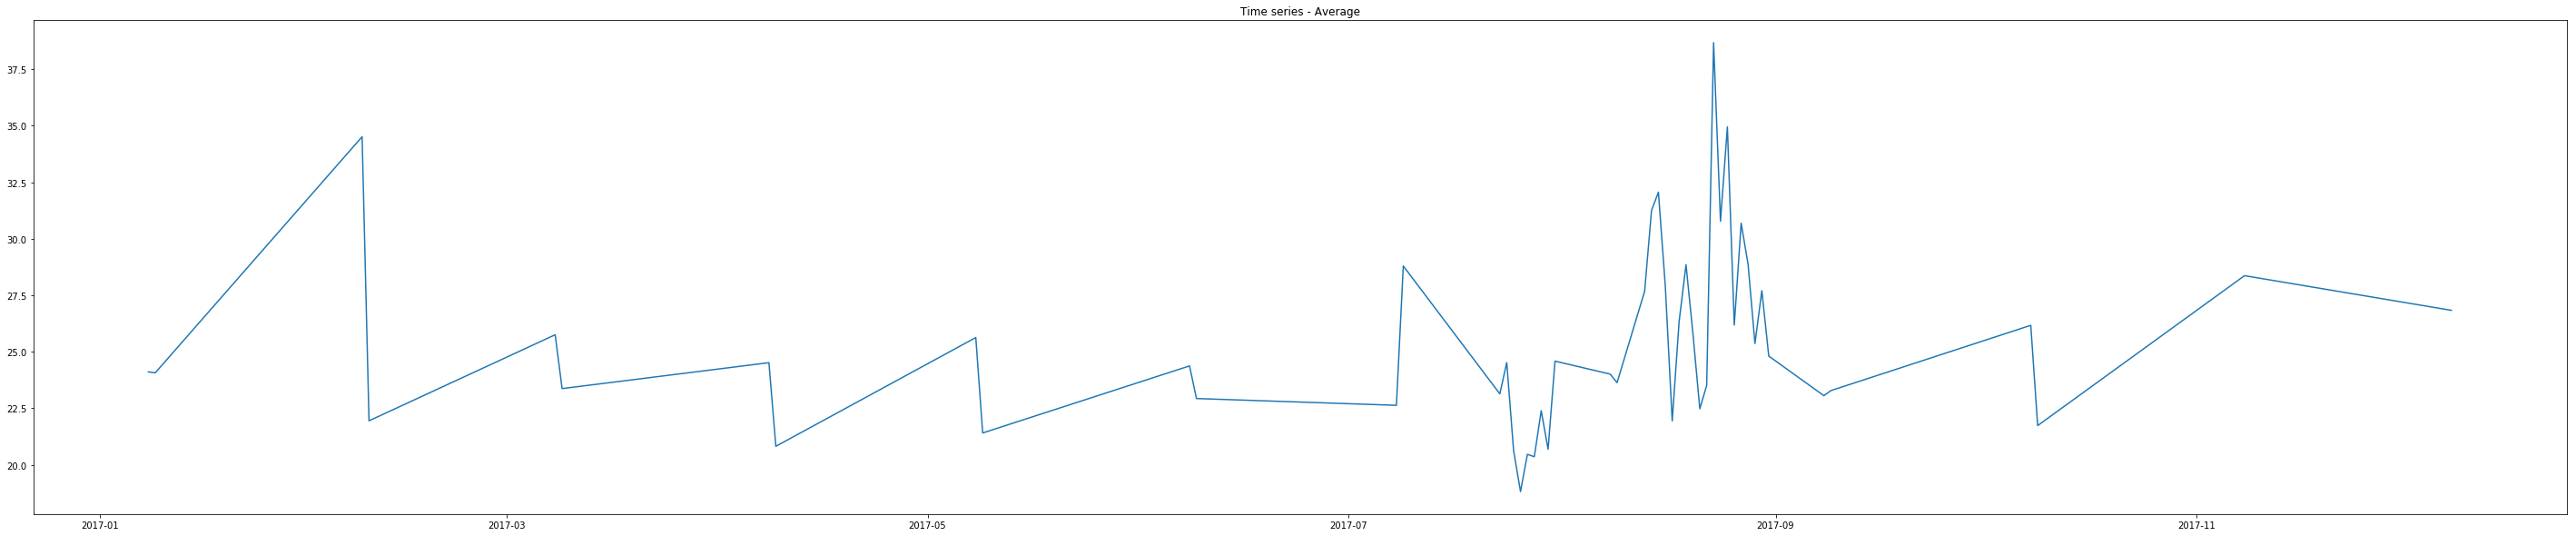

In [0]:
plt.figure(figsize=(50,10))
mean_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].mean()
plt.plot(mean_group)
plt.title('Time series - Average')
plt.show()

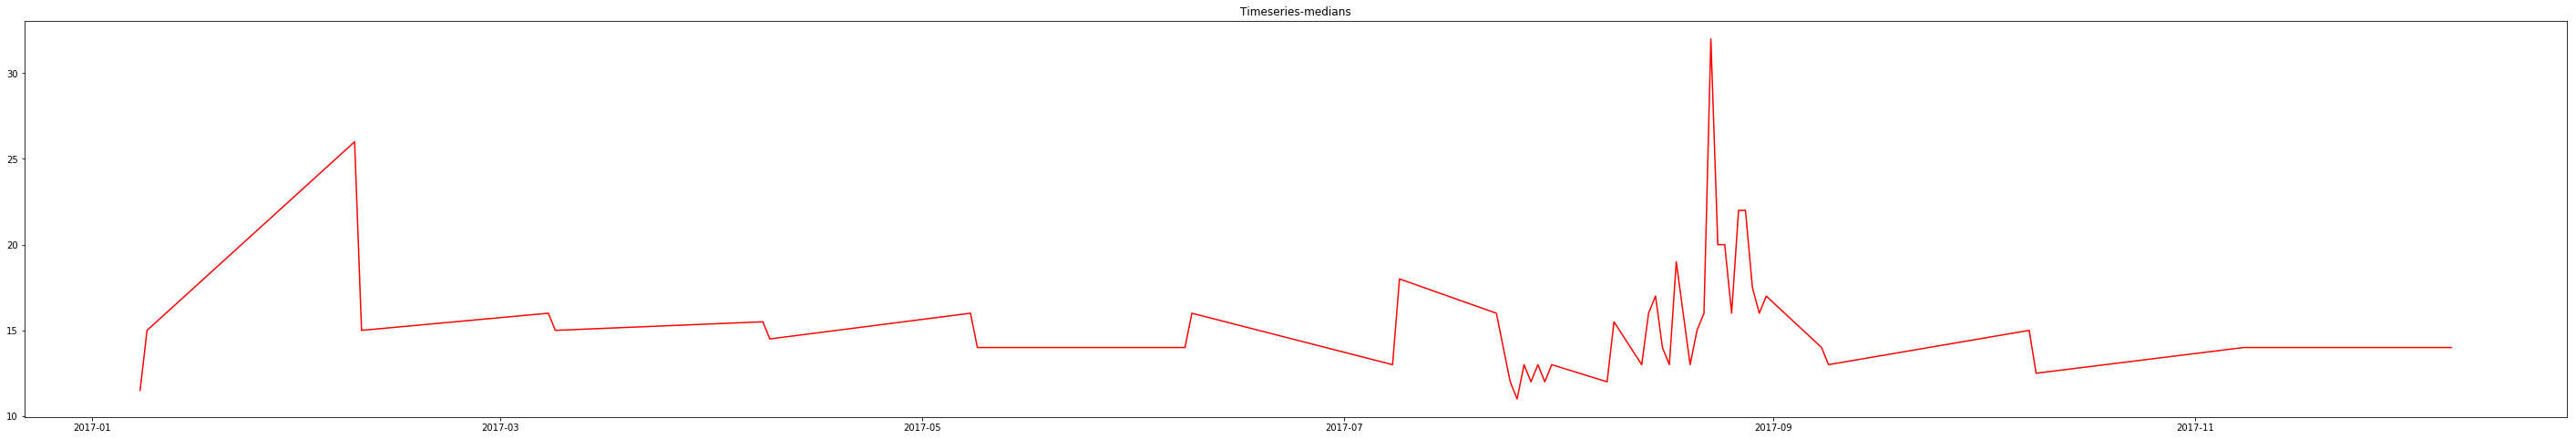

In [0]:
plt.figure(figsize=(50,8))
median_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].median()
plt.plot(median_group,color='r')
plt.title('Timeseries-medians')
plt.show()

In [0]:
plt.figure(figsize=(50,8))
std_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].std()

<Figure size 3600x576 with 0 Axes>

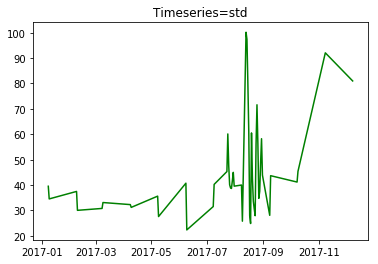

In [0]:
plt.plot(std_group,color ='g')
plt.title('Timeseries=std')
plt.show()

In [0]:
#for the graphics
train_flattened['month_num'] = train_flattened['month']
train_flattened['month'].replace('11','11-November',inplace = True)
train_flattened['month'].replace('12','12-December',inplace = True)
train_flattened

,Page,date,Visits,weekend,mean,median,Weekday,year,month,day,month_num
0,2NE1_zh.wikipedia.org_all-access_spider,2017-07-23,20.0,0.0,26.50,22.5,6,2017,7,23,7
1,2NE1_zh.wikipedia.org_all-access_spider,2017-07-24,16.0,0.0,26.50,22.5,0,2017,7,24,7
2,2NE1_zh.wikipedia.org_all-access_spider,2017-07-25,31.0,0.0,26.50,22.5,1,2017,7,25,7
3,2NE1_zh.wikipedia.org_all-access_spider,2017-07-26,19.0,0.0,26.50,22.5,2,2017,7,26,7
4,2NE1_zh.wikipedia.org_all-access_spider,2017-07-27,14.0,0.0,26.50,22.5,3,2017,7,27,7
5,2NE1_zh.wikipedia.org_all-access_spider,2017-07-28,20.0,0.0,26.50,22.5,4,2017,7,28,7
6,2NE1_zh.wikipedia.org_all-access_spider,2017-07-29,13.0,0.0,26.50,22.5,5,2017,7,29,7
7,2NE1_zh.wikipedia.org_all-access_spider,2017-07-30,22.0,0.0,26.50,22.5,6,2017,7,30,7
8,2NE1_zh.wikipedia.org_all-access_spider,2017-07-31,14.0,0.0,26.50,22.5,0,2017,7,31,7
9,2NE1_zh.wikipedia.org_all-access_spider,2017-01-08,20.0,0.0,26.50,22.5,6,2017,1,8,1


In [0]:
train_flattened['Weekday_num'] = train_flattened['Weekday']
train_flattened['Weekday'].replace(0,'01-Monday',inplace=True) 
train_flattened['Weekday'].replace(1,'02-Tuesday',inplace=True)
train_flattened['Weekday'].replace(2,'03-Wednesday',inplace=True)
train_flattened['Weekday'].replace(3,'04-Thursday',inplace=True)
train_flattened['Weekday'].replace(4,'05-Friday',inplace=True)
train_flattened['Weekday'].replace(5,'06-Saturday',inplace=True)
train_flattened['Weekday'].replace(6,'07-Sunday',inplace=True)                                   



In [0]:
train_group =train_flattened.groupby(['month','Weekday'])['Visits'].mean().reset_index()
train_group = train_group.pivot('Weekday','month','Visits')
train_group.sort_index(inplace=True)

In [0]:
train_flattened

,Page,date,Visits,weekend,mean,median,Weekday,year,month,day,month_num,Weekday_num
0,2NE1_zh.wikipedia.org_all-access_spider,2017-07-23,20.0,0.0,26.50,22.5,07-Sunday,2017,7,23,7,6
1,2NE1_zh.wikipedia.org_all-access_spider,2017-07-24,16.0,0.0,26.50,22.5,01-Monday,2017,7,24,7,0
2,2NE1_zh.wikipedia.org_all-access_spider,2017-07-25,31.0,0.0,26.50,22.5,02-Tuesday,2017,7,25,7,1
3,2NE1_zh.wikipedia.org_all-access_spider,2017-07-26,19.0,0.0,26.50,22.5,03-Wednesday,2017,7,26,7,2
4,2NE1_zh.wikipedia.org_all-access_spider,2017-07-27,14.0,0.0,26.50,22.5,04-Thursday,2017,7,27,7,3
5,2NE1_zh.wikipedia.org_all-access_spider,2017-07-28,20.0,0.0,26.50,22.5,05-Friday,2017,7,28,7,4
6,2NE1_zh.wikipedia.org_all-access_spider,2017-07-29,13.0,0.0,26.50,22.5,06-Saturday,2017,7,29,7,5
7,2NE1_zh.wikipedia.org_all-access_spider,2017-07-30,22.0,0.0,26.50,22.5,07-Sunday,2017,7,30,7,6
8,2NE1_zh.wikipedia.org_all-access_spider,2017-07-31,14.0,0.0,26.50,22.5,01-Monday,2017,7,31,7,0
9,2NE1_zh.wikipedia.org_all-access_spider,2017-01-08,20.0,0.0,26.50,22.5,07-Sunday,2017,1,8,1,6


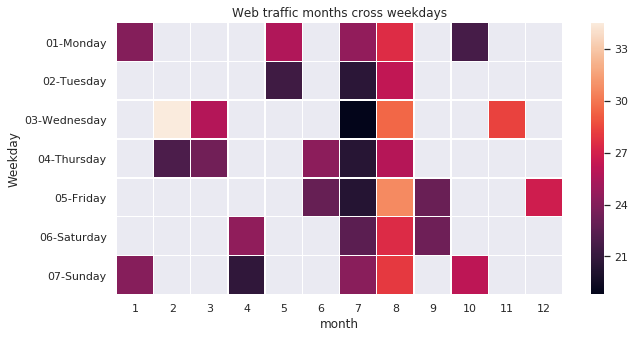

In [0]:
sns.set(font_scale=1)
#draw a heatmap with the numeric values in each cell
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(train_group,annot = False,ax =ax,fmt = "e",linewidth = 0.5)
plt.title('Web traffic months cross weekdays')
plt.show()

In [0]:
train_day = train_flattened.groupby(['month' , 'day'])['Visits'].mean().reset_index()
train_day = train_day.pivot('day','month','Visits')
train_day.sort_index(inplace = True)
train_day.dropna(inplace=True)

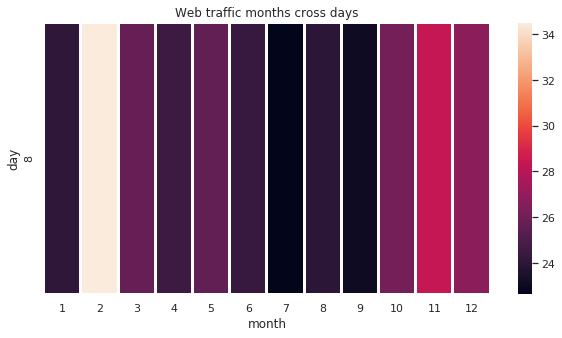

In [0]:
#drawa heatmap with thenumeric values  in each cell
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(train_day,annot = False,ax= ax,fmt="d",linewidth = 2 )
plt.title('Web traffic months cross days')
plt.show()

In [0]:
times_series_means = pd.DataFrame(mean_group).reset_index(drop=False)
times_series_means['Weekday'] = times_series_means['date'].apply(lambda x : x.weekday())
times_series_means['Data_str'] = times_series_means['date'].apply(lambda x : str(x))
times_series_means[['year','month','day']] = pd.DataFrame(times_series_means['Data_str'].str.split('-',2).tolist(),columns=['year','month','day'])
date_staging = pd.DataFrame(times_series_means['day'].str.split(' ',2).tolist(),columns= ['day','other'] )
time_series_means['day'] = date_staging['day'] * 1

time_series_means.head()

NameError: ignored

In [0]:
times_series_means.reset_index(drop=True,inplace=True)

def lag_func(data,lag):
    lag = lag
    X = lagmat(data["diff"], lag)
    lagged = data.copy()
    for c in range(1,lag+1):
        lagged["lag%d" % c] = X[:, c-1]
    return lagged

def diff_creation(data):
    data["diff"] = np.nan
    data.ix[1:, "diff"] = (data.iloc[1:, 1].as_matrix() - data.iloc[:len(data)-1, 1].as_matrix())
    return data

df_count = diff_creation(times_series_means)

# Creation of 7 features with "diff"
lag = 7
lagged = lag_func(df_count,lag)
last_date = lagged['date'].max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


In [0]:
lagged.head()

,date,Visits,Weekday,Data_str,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,2017-01-08,24.107143,6,2017-01-08 00:00:00,2017,01,08 00:00:00,NaN,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2017-01-09,24.067010,0,2017-01-09 00:00:00,2017,01,09 00:00:00,-0.040133,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0
2,2017-02-08,34.512821,2,2017-02-08 00:00:00,2017,02,08 00:00:00,10.445810,-0.040133,NaN,0.000000,0.0,0.0,0.0,0.0
3,2017-02-09,21.944162,3,2017-02-09 00:00:00,2017,02,09 00:00:00,-12.568658,10.445810,-0.040133,NaN,0.0,0.0,0.0,0.0
4,2017-03-08,25.751269,2,2017-03-08 00:00:00,2017,03,08 00:00:00,3.807107,-12.568658,10.445810,-0.040133,NaN,0.0,0.0,0.0


In [0]:
lag = 7
lagged = lag_func(df_count,lag)
last_date = lagged['date'].max()

In [0]:
#train test split
def train_test(data_lag):
  xc = ["lag%d" %i for i in range (1,lag + 1)] + ['Weekday'] + ['day']
  split = 0.70
  xt = data_lag[(lag + 1) :] [xc]
  yt = data_lag[(lag + 1) :] ["diff"]
  isplit = int(len(xt) *  split)
  x_train,y_train,x_test,y_test = xt[:isplit],yt[:isplit],xt[isplit:],yt[isplit:]
  return x_train,y_train,x_test,y_test,xt,yt

x_train,y_train,x_test,y_test,xt,yt = train_test(lagged)

In [0]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((29, 9), (29,), (13, 9), (13,))